### Practice Exercise (Polynomial Regression)

In [2]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import COFFEE_BREW

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#loading dataset
df = pd.read_csv(COFFEE_BREW)

print(f'Shape of the Dataset: {df.shape}\n')
print(f'Dataset:\n {df}\n\n')
print(f'Column Names {df.columns}\n')

X = df[['Water_Temp_C']].values
y_taste = df[['Taste_Score']].values
y_bitter = df[['Bitterness_Level']].values


Shape of the Dataset: (13, 3)

Dataset:
     Water_Temp_C  Taste_Score  Bitterness_Level
0             70           42                 8
1             75           58                12
2             80           72                18
3             85           84                26
4             90           92                36
5             92           96                42
6             94           98                49
7             96           97                57
8             98           93                66
9            100           86                76
10           102           76                87
11           104           63                96
12           106           48               100


Column Names Index(['Water_Temp_C', 'Taste_Score', 'Bitterness_Level'], dtype='object')



### Polynomial Regression on Taste Score

R2_score for each degree is 0.8995
R2_score for each degree is 0.9927
R2_score for each degree is 0.9973


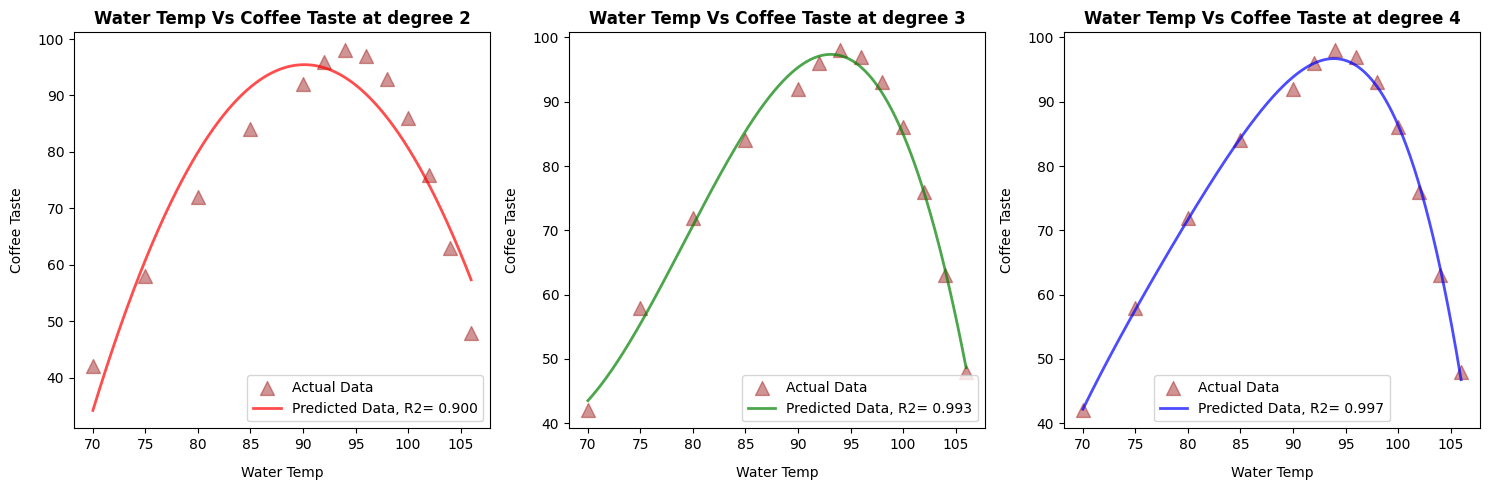

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


colors=['r','green','blue']
degrees = [2,3,4]

results_taste = {}
plt.figure(figsize=(15,5))
for idx,degree in enumerate(degrees):
    plt.subplot(1, 3 , idx+1)
    #fit the model
    poly_taste = PolynomialFeatures(degree=degree)
    X_poly = poly_taste.fit_transform(X)

    model_taste = LinearRegression()
    model_taste.fit(X_poly,y_taste)

    y_taste_pred = model_taste.predict(X_poly)

    R2_score_taste = r2_score(y_taste,y_taste_pred)

    #smooth visualization
    X_smooth_taste = np.linspace(X.min(),X.max(),500).reshape(-1,1)
    X_smooth_taste_poly = poly_taste.transform(X_smooth_taste)
    y_taste_pred_smooth = model_taste.predict(X_smooth_taste_poly)

    plt.scatter(X,y_taste,label='Actual Data',color='brown',alpha=0.5,marker='^',s=100)
    plt.plot(X_smooth_taste,y_taste_pred_smooth,label=f'Predicted Data, R2= {R2_score_taste:.3f}',linewidth=2,color=colors[idx],alpha=0.7)
    plt.title(f'Water Temp Vs Coffee Taste at degree {degree}',fontweight=600)
    plt.ylabel('Coffee Taste',labelpad=10)
    plt.xlabel('Water Temp',labelpad=10)
    plt.legend()

    print(f'R2_score for each degree is {R2_score_taste:.4f}')

    results_taste[degree] = {
        'poly_taste' : poly_taste,
        'model_taste': model_taste,
        'R2_score_taste' : R2_score_taste,
        'y_taste_pred' : y_taste_pred,
        'y_taste_pred_smooth' : y_taste_pred_smooth,
        'X_smooth_taste' : X_smooth_taste
    }
plt.tight_layout()
plt.show()




#### Optimal Temperature for Best Taste

Optimal Temp Taste is 93.122 and Maximum taste is 97.371


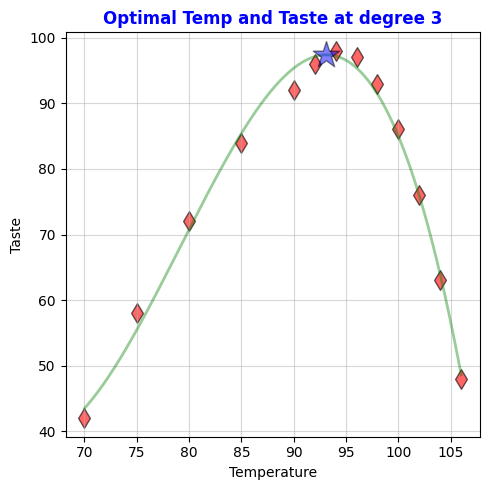

In [45]:
best_degree = 3

poly_taste_best = results_taste[best_degree]['poly_taste']
model_taste_best = results_taste[best_degree]['model_taste']

temp_search = np.linspace(X.min(),X.max(),10000).reshape(-1,1)
temp_search_poly = poly_taste_best.transform(temp_search)

y_pred_taste_best = model_taste_best.predict(temp_search_poly)

taste_idx = np.argmax(y_pred_taste_best)

optimal_temp_taste = temp_search[taste_idx].reshape(-1,1)
taste_max = model_taste_best.predict(poly_taste_best.transform(optimal_temp_taste))
print(f'Optimal Temp Taste is {optimal_temp_taste.flatten().item():.3f} and Maximum taste is {taste_max.item():.3f}')

#visualization of optimal temp and max taste
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y_taste,label='Actual Data',marker='d',color='r',alpha=0.6,s=100,edgecolor='black')
ax.plot(temp_search,y_pred_taste_best,label='Predicted data',color='green',alpha=0.4,linewidth=2)
ax.scatter([optimal_temp_taste],[taste_max],label='Optimal Temp and Taste',color='blue',marker='*',s=400,edgecolor='black',zorder=5,alpha=0.5)
ax.set_title(f'Optimal Temp and Taste at degree {best_degree}',fontweight=600,color='blue')
ax.set_ylabel('Taste')
ax.set_xlabel('Temperature')
ax.grid(True,alpha=0.5)
plt.tight_layout()
plt.show()

#### Polynomial Regression on Bitterness

R2 Score of Bitterness target is 0.9208 for degree 1
R2 Score of Bitterness target is 0.9956 for degree 2
R2 Score of Bitterness target is 0.9957 for degree 3
R2 Score of Bitterness target is 0.9982 for degree 4


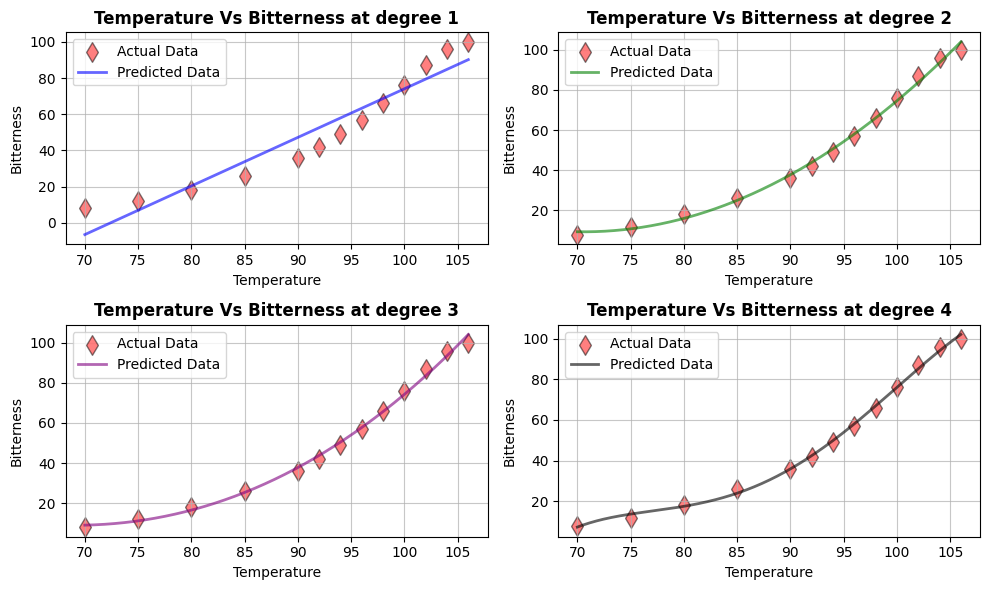

In [61]:
degrees = [1,2,3,4]
colors=['blue','green','purple','black']
results_bitter = {}

plt.figure(figsize=(10,6))

for idx, degree in enumerate(degrees):
    #fit the model
    poly_bitter = PolynomialFeatures(degree=degree)
    X_bitter_poly     = poly_bitter.fit_transform(X)

    model_bitter = LinearRegression()
    model_bitter.fit(X_bitter_poly,y_bitter)

    y_pred_bitter = model_bitter.predict(X_bitter_poly)

    #for smooth visualization
    X_bitter_smooth = np.linspace(X.min(),X.max(),500).reshape(-1,1)
    X_bitter_smooth_poly = poly_bitter.transform(X_bitter_smooth)

    y_pred_bitter_smooth = model_bitter.predict(X_bitter_smooth_poly)

    R2_score_bitter = r2_score(y_bitter,y_pred_bitter)
    print(f'R2 Score of Bitterness target is {R2_score_bitter:.4f} for degree {degree}')

    results_bitter[degree] = {
        'poly_bitter' : poly_bitter,
        'model_bitter' : model_bitter,
        'R2_score_bitter' : R2_score_bitter,
        'y_pred_bitter' : y_pred_bitter,
        'X_bitter_smooth'  : X_bitter_smooth,
        'y_pred_bitter_smooth' : y_pred_bitter_smooth,
    }

    plt.subplot(2,2,idx+1)
    plt.scatter(X,y_bitter,label='Actual Data',color='r',marker='d',s=100,edgecolor='black',alpha=0.5)
    plt.plot(X_bitter_smooth,y_pred_bitter_smooth,label='Predicted Data',color=colors[idx],linewidth=2,alpha=0.6)
    plt.title(f'Temperature Vs Bitterness at degree {degree}',fontweight=600)
    plt.ylabel('Bitterness')
    plt.xlabel('Temperature')
    plt.grid(True,alpha=0.7)
    plt.legend()
plt.tight_layout()
plt.show()
    

#### Dual Axis Visualization graph

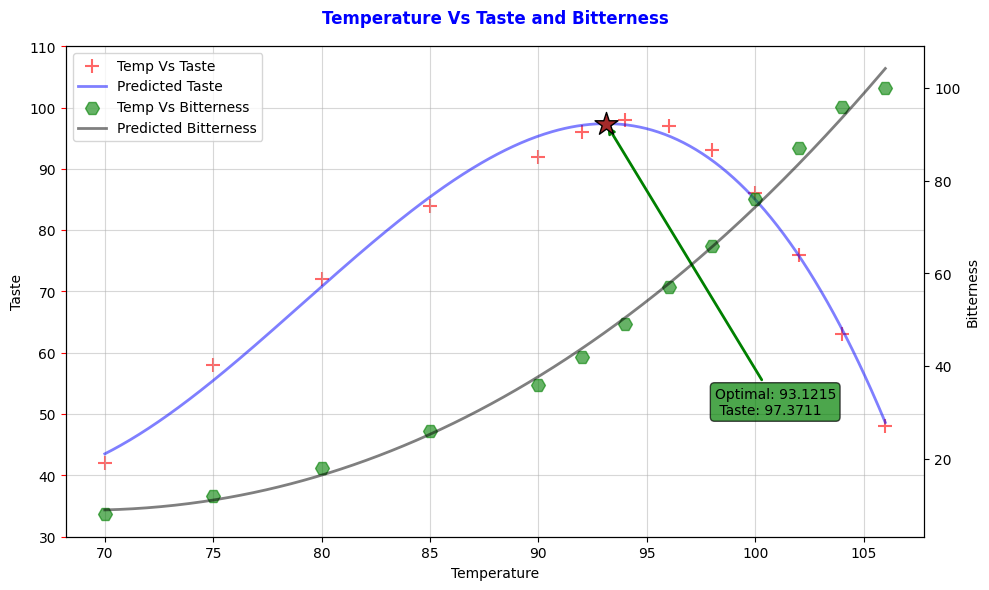

In [104]:
degree = 3

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.twin = ax1.twinx()

ax1.scatter(X,y_taste,label='Temp Vs Taste',marker='+',color='r',s=100,alpha=0.6)
ax1.plot(results_taste[degree]['X_smooth_taste'],results_taste[degree]['y_taste_pred_smooth'],label='Predicted Taste',color='blue',linewidth=2,alpha=0.5)
ax1.set_ylabel('Taste')
ax1.set_xlabel('Temperature')
ax1.tick_params('y',color='r')
ax1.set_ylim(30,110)

ax1.twin.scatter(X,y_bitter,label='Temp Vs Bitterness',marker='H',color='green',s=100,alpha=0.6)
ax1.twin.plot(results_bitter[degree]['X_bitter_smooth'],results_bitter[degree]['y_pred_bitter_smooth'],color='black',alpha=0.5,linewidth=2,label='Predicted Bitterness')
ax1.twin.set_ylabel('Bitterness')

ax1.scatter([optimal_temp_taste],[taste_max],marker='*',color='brown',s=300,edgecolor='black',zorder=5)
ax1.annotate(f'Optimal: {optimal_temp_taste.item():.4f}\n Taste: {taste_max.item():.4f}',
            xy=(optimal_temp_taste,taste_max),
            xytext=(optimal_temp_taste - -5,50),fontsize=10,
            arrowprops=dict(arrowstyle='->',color='green',lw=2),
            bbox=dict(boxstyle='round',facecolor='green',alpha=0.7))
lines1, label1 = ax1.get_legend_handles_labels()
lines2 ,label2 = ax1.twin.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2, label1 + label2, loc='upper left'
    ,fontsize=10)
plt.title(f'Temperature Vs Taste and Bitterness',fontweight=600,y=1.03,color='blue')
ax1.grid(True,alpha=0.5)
plt.tight_layout()
plt.show()